<a href="https://colab.research.google.com/github/saptarshidatta96/MTech_Sem1/blob/main/NB_Classifier_on_Wine_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_curve
from math import sqrt
from math import pi
from math import exp
from sklearn import preprocessing 
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import datasets
from itertools import cycle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
%matplotlib inline

##Importing the Wine Dataset

In [ ]:
wine = datasets.load_wine()
X = wine.data
y = wine.target

In [ ]:
data = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= wine['feature_names'] + ['target'])

In [ ]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [ ]:
data.shape

(178, 14)

In [ ]:
print(X)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


In [ ]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [ ]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, train_size=0.7, random_state=42)
sss.get_n_splits(X, y)

1

In [ ]:
for train_index, test_index in sss.split(X, y):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 12  30  36  31 120   8 147 126 140  11  78  79 160  96  53  13  25  95
 101  50  71  90 116  74  65 145  85  16 162 125 159 135  45 167 119 122
  75  83 148  32  24  33  44  15  26  97 107 154   4 133  43  41   1 171
  57 153  77 117  69   9  81  52  88 123  19 137 124  17  49  82  70 139
  37   6 172  59 106 104 158 170 174 131  99  89  54   0 127  86  72 141
 146 113 111 149   5  29   3 157 109 175 103  73 151  56  63 115  55  91
 161  80 150  40 142  47  27  67 110 163  34 168 114 152 136  61] TEST: [  2  64  18   7  38  58 156  87 121 130 118  98 177  94  22 155  76  23
 176 169 102 144 138 143  68 164  35  62  14 112  21  66 134  93 100 173
  60 129  84  20 132  51  46  48  10  92 128  42 166  39 108 105 165  28]


In [ ]:
train_data = pd.DataFrame(data= np.c_[X_train, y_train],
                     columns= wine['feature_names'] + ['target'])

In [ ]:
test_data = pd.DataFrame(data= np.c_[X_test, y_test],
                     columns= wine['feature_names'] + ['target'])

In [ ]:
train_data.shape

(124, 14)

In [ ]:
data.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

##Distribution of Train Data

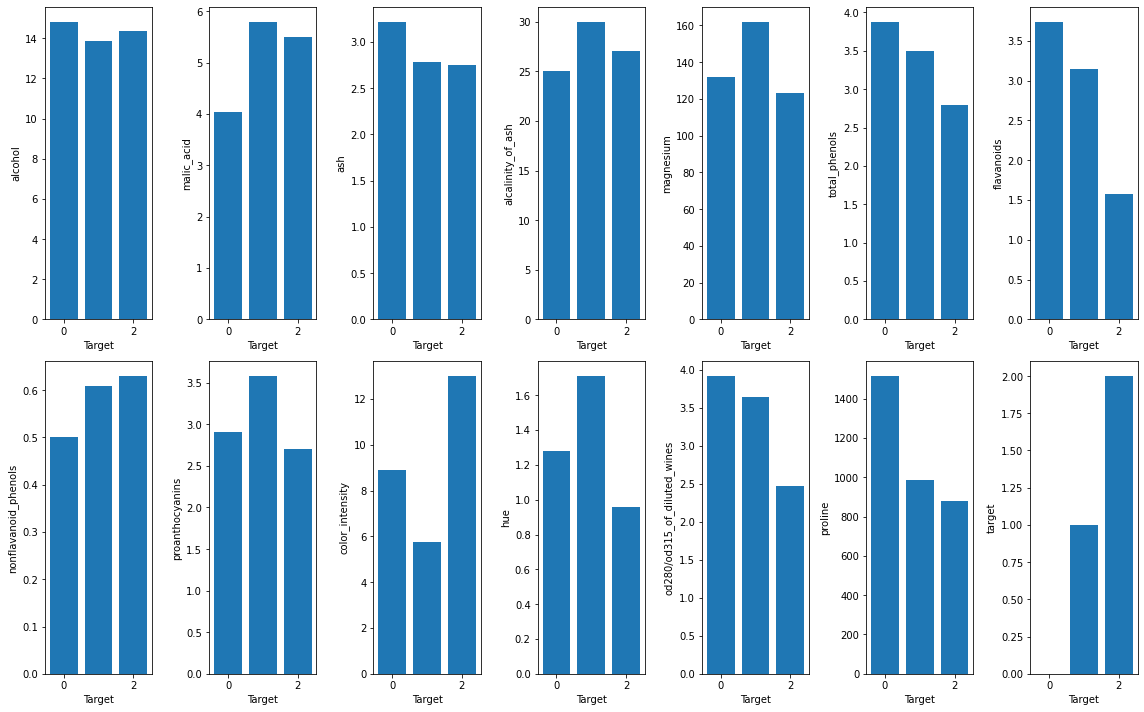

In [ ]:
fig, axs = plt.subplots(figsize = (16,10), nrows = 2, ncols = 7)
for j in range(2):
    for i in range(7):
      if j == 0:
        k = i
      else:
        k = i + 7
      axs[j][i].bar(train_data['target'], height = train_data[train_data.columns[k]])
      axs[j][i].set_ylabel(train_data.columns[k])
      axs[j][i].set_xlabel('Target')
 
 
plt.tight_layout()

##Distribution of Test Data

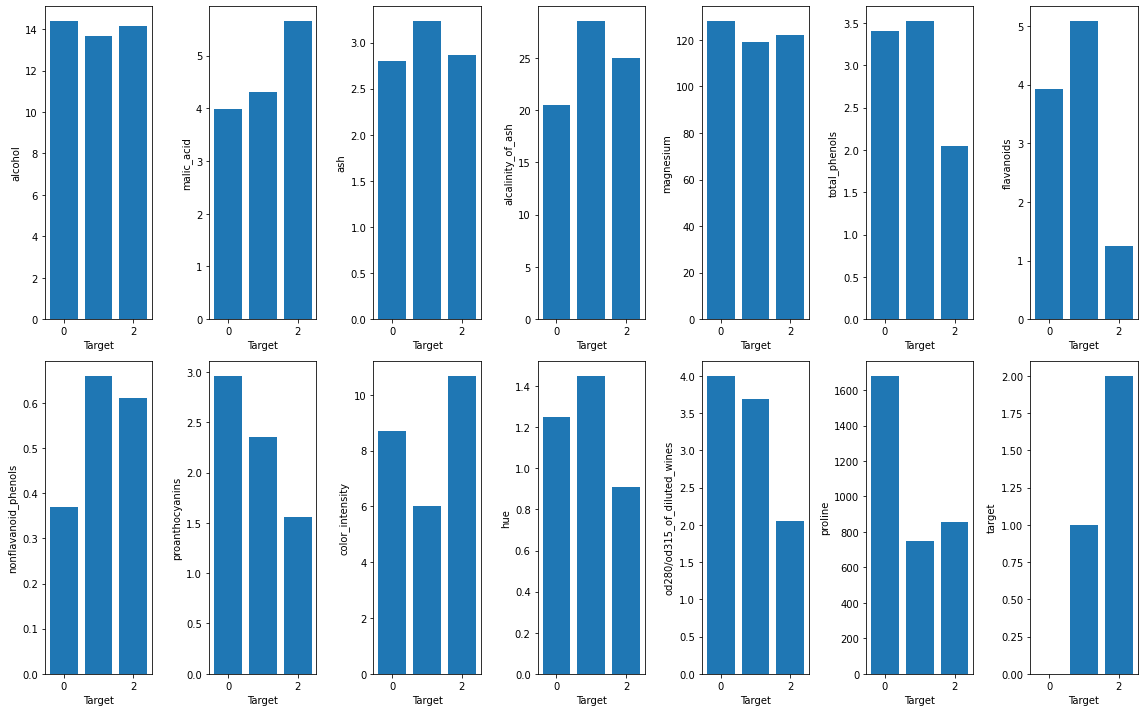

In [ ]:
fig, axs = plt.subplots(figsize = (16,10), nrows = 2, ncols = 7)
for j in range(2):
    for i in range(7):
      if j == 0:
        k = i
      else:
        k = i + 7
      axs[j][i].bar(test_data['target'], height = test_data[test_data.columns[k]])
      axs[j][i].set_ylabel(test_data.columns[k])
      axs[j][i].set_xlabel('Target')
 
 
plt.tight_layout()


##the class priors

In [ ]:
nb = GaussianNB()
y_pred = nb.fit(X_train, y_train).predict(X_test)
print(nb.class_prior_)

[0.33064516 0.40322581 0.26612903]


In [ ]:
y_pred

array([0, 1, 0, 0, 0, 0, 2, 1, 1, 2, 1, 1, 2, 1, 0, 2, 1, 0, 2, 2, 1, 2,
       2, 2, 1, 2, 0, 1, 0, 1, 0, 1, 2, 1, 1, 2, 1, 1, 1, 0, 2, 0, 0, 0,
       0, 1, 1, 0, 2, 0, 1, 1, 2, 0])

In [ ]:
y_test

array([0, 1, 0, 0, 0, 0, 2, 1, 1, 2, 1, 1, 2, 1, 0, 2, 1, 0, 2, 2, 1, 2,
       2, 2, 1, 2, 0, 1, 0, 1, 0, 1, 2, 1, 1, 2, 1, 1, 1, 0, 2, 0, 0, 0,
       0, 1, 1, 0, 2, 0, 1, 1, 2, 0])

##Confusion matrix for Test

In [ ]:
df_confusion = confusion_matrix(y_test, y_pred) 
print(df_confusion)

[[18  0  0]
 [ 0 21  0]
 [ 0  0 15]]


##Accuracy for Test

In [ ]:
def overall_accuracy(df_confusion, data):
  sum_diag = 0
  for i in range(len(df_confusion)):
    sum_diag = df_confusion[i][i] + sum_diag
  overall_acc = sum_diag/ data.shape[0]
  #print(overall_acc)
  return overall_acc

In [ ]:
acc_test = overall_accuracy(df_confusion, test_data)
acc_test

1.0

##Confusion Matrix on Train

In [ ]:
nb = GaussianNB()
y_pred = nb.fit(X_train, y_train).predict(X_train)

In [ ]:
df_confusion = confusion_matrix(y_train, y_pred) 
print(df_confusion)

[[39  2  0]
 [ 0 48  2]
 [ 0  0 33]]


In [ ]:
acc_train = overall_accuracy(df_confusion, train_data)
acc_train

0.967741935483871

## Mean and variance of each feature per class.

In [ ]:
def split_by_class(data):
  splitted_data = dict()
  for i in range(len(data)):
    for j in range(data.shape[1]-1):
      feature = data.iloc[i][j]
      class_name = data.iloc[i][data.shape[1]-1]
      if class_name not in splitted_data:
        splitted_data[class_name] = list()
      splitted_data[class_name].append(feature)

  return splitted_data


def stats_by_class(data):
  splitted = split_by_class(data)
  splitted_stats = dict()
  listt = []
  x = data.shape[1] - 1
  for key, value in splitted.items():
    for i in range(len(splitted[0])):
      if key in data['target'].unique():
        mean = [np.mean(splitted[key][i : : x]) for i in range(len(splitted[key])//(len(splitted[key])//x))]
        variance = [np.var(splitted[key][i : : x]) for i in range(len(splitted[key])//(len(splitted[key])//x))]
        length = [len(splitted[key][i : : x]) for i in range(len(splitted[key])//(len(splitted[key])//x))]
    splitted_stats[key] = mean, variance, length[0]
  return splitted_stats

In [ ]:
stats = stats_by_class(train_data)

In [ ]:
print(stats)

{0.0: ([13.73048780487805, 1.9470731707317073, 2.449756097560976, 17.102439024390247, 106.63414634146342, 2.8285365853658537, 2.940243902439024, 0.3017073170731707, 1.8512195121951225, 5.56780487804878, 1.0509756097560974, 3.0885365853658535, 1112.8048780487804], [0.202950981558596, 0.3957621653777512, 0.060597501487210007, 7.295359904818561, 116.28078524687689, 0.11488078524687684, 0.13762676977989294, 0.005394646044021415, 0.14638631766805474, 1.4830415229030338, 0.012662462819750147, 0.1088661511005354, 39725.66924449732], 41), 1.0: ([12.2424, 1.9626, 2.2328, 20.524, 95.14, 2.2536, 2.0468, 0.35080000000000006, 1.7122, 2.9608, 1.0589199999999999, 2.8021999999999996, 531.26], [0.27004624000000005, 1.1078352399999998, 0.07888416000000001, 10.585423999999998, 347.6004000000001, 0.29721104, 0.36668176, 0.01231936, 0.35924116, 0.7500353599999999, 0.0396851536, 0.22852116, 25756.2324], 50), 2.0: ([13.074545454545454, 3.2009090909090907, 2.4542424242424246, 21.560606060606062, 99.2727272727

##Training a Naive Bayes Classifier setting the priors in the ratio 40-40-20

In [ ]:
nb = GaussianNB(priors=[0.4, 0.4, 0.2])
y_pred1 = nb.fit(X_train, y_train).predict(X_test)

##Confusion Matrix on Test

In [ ]:
df_confusion = confusion_matrix(y_test, y_pred1) 
print(df_confusion)

[[18  0  0]
 [ 1 20  0]
 [ 0  0 15]]


##Accuracy of Test

In [ ]:
acc_test = overall_accuracy(df_confusion, test_data)
acc_test

0.9814814814814815

##Confusion Matrix on Train

In [ ]:
nb = GaussianNB(priors=[0.4, 0.4, 0.2])
y_pred2 = nb.fit(X_train, y_train).predict(X_train)

In [ ]:
df_confusion = confusion_matrix(y_train, y_pred2) 
print(df_confusion)

[[39  2  0]
 [ 0 48  2]
 [ 0  0 33]]


In [ ]:
acc_train = overall_accuracy(df_confusion, train_data)
acc_train

0.967741935483871

##Training a Naive Bayes Classifier setting the priors in the ratio 40-40-20

In [ ]:
nb = GaussianNB(priors=[0.8, 0.1, 0.1])
y_pred = nb.fit(X_train, y_train).predict(X_test)

##Confusion Matrix on Test

In [ ]:
df_confusion = confusion_matrix(y_test, y_pred) 
print(df_confusion)

[[18  0  0]
 [ 1 20  0]
 [ 0  0 15]]


##Accuracy on Test

In [ ]:
acc_train = overall_accuracy(df_confusion, test_data)
acc_train

0.9814814814814815

##Confusion Matrix on Train

In [ ]:
nb = GaussianNB(priors=[0.8, 0.1, 0.1])
y_pred3 = nb.fit(X_train, y_train).predict(X_train)

In [ ]:
df_confusion = confusion_matrix(y_train, y_pred3) 
print(df_confusion)

[[41  0  0]
 [ 0 47  3]
 [ 0  0 33]]


##Accuracy on Train

In [ ]:
acc_train = overall_accuracy(df_confusion, train_data)
acc_train

0.9758064516129032